# Fecha de entrega: 27/08/2022 (corresponde a clase 20)

# Algoritmo de clasificación: Support Vector Machine

# Diccionario

**BTC_various_indicators_fv**

- **Date**: fecha en YYYY-MM-DD (object [ns])
- **Price**: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Open**: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **High**: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Low**: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Vol.**: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
- **Percentage_diff**: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
- **Target**: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
- **Price_gold**: indica el precio de cierre del oro en el día de la fecha (float) (USD) (variable numérica continua)
- **Price_copper**: indica el precio de cierre del cobre en el día de la fecha (float) (USD) (variable numérica continua)
- **Price_aluminium**: indica el precio de cierre del platino en el día de la fecha (float) (USD) (variable numérica 
- **Trend**: indica la tendencia de la serie de tiempo en relación con la variable [Price] (float) (variable numérica continua)
- **Residuals**: indica los residuales de la serie de tiempo en relación con la variable [Price] (float) (variable numérica continua)
- **EMA_7d**: media móvil exponencial de 7 días (USD) (float) (Variable numérica continua)
- **HT_TRENDLINE**: indicador de Hilbert Transform - Instantaneous Trendline (USD) (float) (Variable numérica continua)
- **BBANDS_upper_band**: banda superior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
- **BBANDS_middle_band**: banda media del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
- **BBANDS_lower_band**: banda inferior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
- **PSAR**: indicador Parabolic SAR (USD) (float) (Variable numérica continua)Price_silver: indica el precio de cierre de la plata en el día de la fecha (float) (USD) (variable numérica continua)
- **EMA_7d_ET**: valores categóricos de la aplicación de la estrategia de trading EMA de 7 días (comprar, vender, mantener posición) (object) (Variable categórica)
- **HT_TRENDLINE_ET**: valores categóricos de la aplicación de la estrategia de trading HT Trendline (comprar, vender, mantener posición) (object) (Variable categórica)
- **PSAR_ET**: valores categóricos de la aplicación de la estrategia de trading PSAR (comprar, vender, mantener posición) (object) (Variable categórica)
- **ADX_PDM**: valores del Máximo Actual Menos el Máximo Anterior (+DM) (float) (Variable numérica continua)
- **ATR**: valores del indicador Average True Range (Promedio de Rango Verdadero) (float) (Variable numérica continua)
- **Linearregression**: precio estimado por regresión lineal (USD) (float) (Variable numérica continua)
- **Linearintercept**: intercepción de la regresión lineal (USD) (float) (Variable numérica continua)
- **STDDEV**: desviación estándar (medición de la dispersión de los datos) (float) (Variable numérica continua)
- **Price_SP500**: indica el valor de cierre de la bolsa de valores S%P500 (USD) (Variable numérica continua)
- **Price_NASDAQ**: indica el valor de cierre de la bolsa de valores NASDAQ (USD) (float) (Variable numérica continua)
- **Price_DJ**: indica el valor de cierre de la bolsa de valores Dow Jones (USD) (float) (Variable numérica continua)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_various_indicators_fv

In [3]:
# Se carga la base de datos de BTC_various_indicators_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/12zbCtfvIQsTQdpbrVnjlhKgsBc5yxzwn/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_various_indicators_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_various_indicators_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
0,2014-06-23,591.2,603.6,604.7,582.9,2650.0,-2.06,0.0,1318.0,3.146,1892.5,NaN,NaN,598.498657,594.856768,606.556479,596.56,586.563521,610.10000,70.643884,23.740329,586.831429,622.440000,4.998240,1962.61,4368.68,16937.26,0,0,1,0,0,1,0,1,0
1,2014-06-24,588.8,591.2,595.7,585.4,3080.0,-0.41,0.0,1320.9,3.147,1901.0,NaN,NaN,596.073993,601.432180,605.083259,594.28,583.476741,610.10000,65.597892,22.780305,590.040000,609.688571,5.401629,1949.98,4350.35,16818.13,0,1,0,0,1,0,0,1,0
2,2014-06-25,568.5,588.8,589.6,566.9,3090.0,-3.45,0.0,1322.2,3.160,1903.5,NaN,NaN,589.180494,607.188235,613.466192,589.82,566.173808,606.15600,60.912329,22.774569,588.137143,600.948571,11.823096,1959.53,4379.76,16867.51,0,1,0,0,1,0,0,1,0
3,2014-06-26,582.7,568.5,582.7,565.8,4150.0,2.51,1.0,1316.1,3.161,1898.0,590.300000,15.543527,587.560371,610.918562,609.888969,586.96,564.031031,602.52752,56.561448,22.354957,585.457143,601.571429,11.464484,1957.22,4379.05,16846.13,0,1,0,0,1,0,0,1,0
4,2014-06-27,602.2,582.7,603.9,580.1,3390.0,3.35,1.0,1319.0,3.149,1885.0,596.571429,20.802061,591.220278,614.469470,608.809582,586.68,564.550418,560.80000,73.721345,22.458175,590.088571,595.782857,11.064791,1960.96,4397.93,16851.84,1,0,0,0,1,0,1,0,0


# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_various_indicators_fv_df.shape

(2949, 36)

In [6]:
# Nombre de columnas
BTC_various_indicators_fv_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'Price_gold', 'Price_copper', 'Price_aluminium', 'Trend',
       'Residuals', 'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band',
       'BBANDS_middle_band', 'BBANDS_lower_band', 'PSAR', 'ADX_PDM', 'ATR',
       'Linearregression', 'Linearintercept', 'STDDEV', 'Price_SP500',
       'Price_NASDAQ', 'Price_DJ', 'Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_various_indicators_fv_df.dtypes

Date                            object
Price                          float64
Open                           float64
High                           float64
Low                            float64
Vol.                           float64
Percentage_diff                float64
Target                         float64
Price_gold                     float64
Price_copper                   float64
Price_aluminium                float64
Trend                          float64
Residuals                      float64
EMA_7d                         float64
HT_TRENDLINE                   float64
BBANDS_upper_band              float64
BBANDS_middle_band             float64
BBANDS_lower_band              float64
PSAR                           float64
ADX_PDM                        float64
ATR                            float64
Linearregression               float64
Linearintercept                float64
STDDEV                         float64
Price_SP500                    float64
Price_NASDAQ             

In [8]:
# Columnas y cantidad de registros
BTC_various_indicators_fv_df.count()

Date                           2949
Price                          2949
Open                           2949
High                           2949
Low                            2949
Vol.                           2949
Percentage_diff                2949
Target                         2949
Price_gold                     2949
Price_copper                   2949
Price_aluminium                2949
Trend                          2943
Residuals                      2943
EMA_7d                         2949
HT_TRENDLINE                   2949
BBANDS_upper_band              2949
BBANDS_middle_band             2949
BBANDS_lower_band              2949
PSAR                           2949
ADX_PDM                        2949
ATR                            2949
Linearregression               2949
Linearintercept                2949
STDDEV                         2949
Price_SP500                    2949
Price_NASDAQ                   2949
Price_DJ                       2949
Comprar_EMA_7d_ET           

In [9]:
# Valores NaN
BTC_various_indicators_fv_df.isnull().sum()

Date                           0
Price                          0
Open                           0
High                           0
Low                            0
Vol.                           0
Percentage_diff                0
Target                         0
Price_gold                     0
Price_copper                   0
Price_aluminium                0
Trend                          6
Residuals                      6
EMA_7d                         0
HT_TRENDLINE                   0
BBANDS_upper_band              0
BBANDS_middle_band             0
BBANDS_lower_band              0
PSAR                           0
ADX_PDM                        0
ATR                            0
Linearregression               0
Linearintercept                0
STDDEV                         0
Price_SP500                    0
Price_NASDAQ                   0
Price_DJ                       0
Comprar_EMA_7d_ET              0
Mantener_posicion_EMA_7d_ET    0
Vender_EMA_7d_ET               0
Comprar_HT

In [10]:
BTC_various_indicators_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
0,2014-06-23,591.2,603.6,604.7,582.9,2650.0,-2.06,0.0,1318.0,3.146,1892.5,NaN,NaN,598.498657,594.856768,606.556479,596.56,586.563521,610.10000,70.643884,23.740329,586.831429,622.440000,4.998240,1962.61,4368.68,16937.26,0,0,1,0,0,1,0,1,0
1,2014-06-24,588.8,591.2,595.7,585.4,3080.0,-0.41,0.0,1320.9,3.147,1901.0,NaN,NaN,596.073993,601.432180,605.083259,594.28,583.476741,610.10000,65.597892,22.780305,590.040000,609.688571,5.401629,1949.98,4350.35,16818.13,0,1,0,0,1,0,0,1,0
2,2014-06-25,568.5,588.8,589.6,566.9,3090.0,-3.45,0.0,1322.2,3.160,1903.5,NaN,NaN,589.180494,607.188235,613.466192,589.82,566.173808,606.15600,60.912329,22.774569,588.137143,600.948571,11.823096,1959.53,4379.76,16867.51,0,1,0,0,1,0,0,1,0
3,2014-06-26,582.7,568.5,582.7,565.8,4150.0,2.51,1.0,1316.1,3.161,1898.0,590.300000,15.543527,587.560371,610.918562,609.888969,586.96,564.031031,602.52752,56.561448,22.354957,585.457143,601.571429,11.464484,1957.22,4379.05,16846.13,0,1,0,0,1,0,0,1,0
4,2014-06-27,602.2,582.7,603.9,580.1,3390.0,3.35,1.0,1319.0,3.149,1885.0,596.571429,20.802061,591.220278,614.469470,608.809582,586.68,564.550418,560.80000,73.721345,22.458175,590.088571,595.782857,11.064791,1960.96,4397.93,16851.84,1,0,0,0,1,0,1,0,0


Observaciones:

Se observaron varios registros NaN en "BTC_various_indicators_fv.csv". 

Esto implica la necesidad de tomar una decisión con respecto a este tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En las variables [Trend] y [Residuals], 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2.

Solución: dado que el modelo SVM no acepta valores NaN, por las razones aducidas arriba, se eliminan. 

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [11]:
# Se crea una copia de BTC_various_indicators_fv_df con nombre BTC_various_indicators y se la reindexa con la variable [Date] como nuevo índice
BTC_various_indicators = BTC_various_indicators_fv_df.set_index("Date")

In [12]:
BTC_various_indicators.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,1703.60,3.2455,2344.0,20787.614286,52.659204,20502.202160,20452.101775,21231.522062,20191.04,19150.557938,22145.543360,3295.564431,1173.821708,20775.511429,20105.874286,520.241031,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,1703.60,3.2455,2344.0,21370.371429,-160.520267,20679.126620,20423.078104,21714.292433,20440.38,19166.467567,22017.409626,3443.366972,1166.898729,20802.237143,20360.105714,636.956216,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,1703.60,3.2455,2344.0,NaN,NaN,20705.744965,20403.832160,21359.693563,20731.32,20102.946437,21894.401241,3290.512188,1147.777391,20673.194286,20699.962857,314.186781,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,1710.20,3.3167,2435.0,NaN,NaN,21160.758724,20435.796762,22585.394742,21186.48,19787.565258,18942.200000,4115.975603,1204.671863,21078.882857,20624.274286,699.457371,3830.85,11360.05,31071.75,0,1,0,0,1,0,1,0,0
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,1708.05,3.2965,2386.0,NaN,NaN,21723.119043,20547.109474,23836.570363,21751.32,19666.069637,19017.654000,4864.377346,1274.016730,21643.817143,20517.854286,1042.625182,3936.69,11713.15,31824.71,0,1,0,0,1,0,0,1,0


Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [13]:
# Se genera un back up
BTC_various_indicators_2 = BTC_various_indicators.copy()

In [14]:
# Se realiza el shift 
BTC_various_indicators_2 ["Target"] = BTC_various_indicators_2 ["Target"].shift(-1)

In [15]:
BTC_various_indicators_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,1703.60,3.2455,2344.0,20787.614286,52.659204,20502.202160,20452.101775,21231.522062,20191.04,19150.557938,22145.543360,3295.564431,1173.821708,20775.511429,20105.874286,520.241031,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,1703.60,3.2455,2344.0,21370.371429,-160.520267,20679.126620,20423.078104,21714.292433,20440.38,19166.467567,22017.409626,3443.366972,1166.898729,20802.237143,20360.105714,636.956216,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,1703.60,3.2455,2344.0,NaN,NaN,20705.744965,20403.832160,21359.693563,20731.32,20102.946437,21894.401241,3290.512188,1147.777391,20673.194286,20699.962857,314.186781,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,1710.20,3.3167,2435.0,NaN,NaN,21160.758724,20435.796762,22585.394742,21186.48,19787.565258,18942.200000,4115.975603,1204.671863,21078.882857,20624.274286,699.457371,3830.85,11360.05,31071.75,0,1,0,0,1,0,1,0,0
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,NaN,1708.05,3.2965,2386.0,NaN,NaN,21723.119043,20547.109474,23836.570363,21751.32,19666.069637,19017.654000,4864.377346,1274.016730,21643.817143,20517.854286,1042.625182,3936.69,11713.15,31824.71,0,1,0,0,1,0,0,1,0


Se elimina el registro NaN de la variable [Target] dado que los modelos no pueden procesar este tipo de datos

In [16]:
BTC_various_indicators_2 = BTC_various_indicators_2 [0:2948]

In [17]:
BTC_various_indicators_2.isnull().sum()

Price                          0
Open                           0
High                           0
Low                            0
Vol.                           0
Percentage_diff                0
Target                         0
Price_gold                     0
Price_copper                   0
Price_aluminium                0
Trend                          5
Residuals                      5
EMA_7d                         0
HT_TRENDLINE                   0
BBANDS_upper_band              0
BBANDS_middle_band             0
BBANDS_lower_band              0
PSAR                           0
ADX_PDM                        0
ATR                            0
Linearregression               0
Linearintercept                0
STDDEV                         0
Price_SP500                    0
Price_NASDAQ                   0
Price_DJ                       0
Comprar_EMA_7d_ET              0
Mantener_posicion_EMA_7d_ET    0
Vender_EMA_7d_ET               0
Comprar_HTTL_ET                0
Mantener_p

In [18]:
BTC_various_indicators_2.dtypes

Price                          float64
Open                           float64
High                           float64
Low                            float64
Vol.                           float64
Percentage_diff                float64
Target                         float64
Price_gold                     float64
Price_copper                   float64
Price_aluminium                float64
Trend                          float64
Residuals                      float64
EMA_7d                         float64
HT_TRENDLINE                   float64
BBANDS_upper_band              float64
BBANDS_middle_band             float64
BBANDS_lower_band              float64
PSAR                           float64
ADX_PDM                        float64
ATR                            float64
Linearregression               float64
Linearintercept                float64
STDDEV                         float64
Price_SP500                    float64
Price_NASDAQ                   float64
Price_DJ                 

In [19]:
BTC_various_indicators_2 = BTC_various_indicators_2.dropna()

# Modelado (SVM)

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (1 día).

**...Recordando que...**

*Objetivo específico del proyecto*

III.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) y a corto plazo, el movimiento alcista o bajista del precio de BTC.

**Explicación**:

En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "SVM" luego de ejecutar un modelo PCA. 

Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.

La variable target del modelo es la columna [Target] de BTC_various_indicators_2.

## Se genera un modelo PCA

In [20]:
# Se genera la variable X (variables) e y (target)
X = BTC_various_indicators_2.drop ('Target', axis=1)
y = BTC_various_indicators_2 ['Target']

In [21]:
# Se separa el data set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Se normalizan los datos para que PCA otorgue mejores resultados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Se aplica PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
# Se analiza la varianza de cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.84850416e-01, 7.19697370e-02, 6.12982657e-02, 5.52920811e-02,
       4.37815968e-02, 3.15571574e-02, 2.93059897e-02, 2.62406085e-02,
       2.14845963e-02, 2.00389963e-02, 1.53304474e-02, 1.44940786e-02,
       9.27126556e-03, 5.56841097e-03, 4.45424701e-03, 2.94861273e-03,
       9.37607887e-04, 4.65705282e-04, 3.92243334e-04, 1.36804660e-04,
       6.46198149e-05, 3.79557923e-05, 3.35277124e-05, 2.03395691e-05,
       1.51094629e-05, 5.33986577e-06, 4.15905226e-06, 6.71293740e-08,
       1.32691688e-08, 1.15341407e-31, 5.47220150e-33, 5.47220150e-33,
       5.47220150e-33, 5.47220150e-33])

Observaciones:
- Las primeras 12 variables expresan el 97,4% de la varianza de los datos.

In [25]:
# Se genera la variable X (variables) e y (target)
X = BTC_various_indicators_2.drop ('Target', axis=1)
y = BTC_various_indicators_2 ['Target']

In [26]:
# Se separa el data set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Se normalizan los datos para que PCA otorgue mejores resultados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Se genera un nuevo PCA con 12 componentes (las variables que recogen el 97,4 % de la varianza de los datos)
pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [33]:
# Se definen los parámetros de búsqueda
param_grid= {'kernel': ['rbf'],
             'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':np.arange(1,10000,50),
             'class_weight': ['balanced'] }

from sklearn.model_selection import RandomizedSearchCV
grid_SVM = RandomizedSearchCV(SVC(), param_grid, refit=True, verbose=3, n_iter=100, cv=5)

In [34]:
grid_SVM.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, random_state=5301;, score=0.618 total time=   0.3s
[CV 2/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, random_state=5301;, score=0.620 total time=   0.3s
[CV 3/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, random_state=5301;, score=0.628 total time=   0.3s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, random_state=5301;, score=0.605 total time=   0.3s
[CV 5/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, random_state=5301;, score=0.606 total time=   0.2s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf, random_state=3701;, score=0.539 total time=   0.2s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf, random_state=3701;, score=0.546 total time=   0.2s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf, random_state=3701;, score=0.541 total time=   

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'class_weight': ['balanced'],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf'],
                                        'random_state': array([   1,   51,  101,  151,  201,  251,  301,  351,  401,  451,  501,
        551,  601,  651,  701,  751,  801,  851,  901,  951, 1001, 1051,
       1101, 1151, 1201, 1251, 1301, 1351, 1401, 1451, 1501, 1551, 1601,
       1651, 1701, 1...
       6601, 6651, 6701, 6751, 6801, 6851, 6901, 6951, 7001, 7051, 7101,
       7151, 7201, 7251, 7301, 7351, 7401, 7451, 7501, 7551, 7601, 7651,
       7701, 7751, 7801, 7851, 7901, 7951, 8001, 8051, 8101, 8151, 8201,
       8251, 8301, 8351, 8401, 8451, 8501, 8551, 8601, 8651, 8701, 8751,
       8801, 8851, 8901, 8951, 9001, 9051, 9101, 9151, 9201, 9251, 9301,
       9351, 9401, 9451, 9501, 9551, 9601, 9651, 9701, 9751, 9801, 9851,
       9901, 9951])},
                   verbose=3)

In [35]:
# print best parameter after tuning
print(grid_SVM.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_SVM.best_estimator_)

{'random_state': 7851, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': 'balanced', 'C': 1000}
SVC(C=1000, class_weight='balanced', gamma=0.01, random_state=7851)


In [36]:
# Se crea el modelo SVM 
modelo = SVC(C = 1000, kernel = 'rbf', gamma=0.01, class_weight = "balanced", random_state=7851)

In [37]:
# Se entrena al modelo
modelo.fit(X_train, y_train)

SVC(C=1000, class_weight='balanced', gamma=0.01, random_state=7851)

In [38]:
# Se busca conocer las predicciones del modelo
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [39]:
# Se calcula el accuracy en los datos de train
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de evaluación para train:', train_accuracy)

# Se calcula el accuracy en los datos de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación para test:', test_accuracy)

% de aciertos sobre el set de evaluación para train: 0.7200509770603228
% de aciertos sobre el set de evaluación para test: 0.66553480475382


[[175 109]
 [ 88 217]]


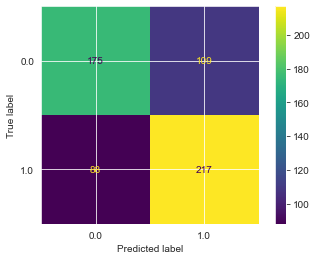

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predicciones
predictions = modelo.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(modelo, X_test, y_test)
plt.show()

Observaciones:
- El modelo es mejor prediciendo los casos de subida de precio pero no de bajada.
- El modelo genera muchos casos de falsos positivos.

In [41]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

Accuracy of the classifier is: 0.66553480475382
Precision Score of the classifier is: 0.6656441717791411
Recall Score of the classifier is: 0.7114754098360656
F1 Score of the classifier is: 0.6877971473851031


Observaciones:
- El mejor modelo predice en un 66,5% de los casos si el precio de BTC sube o baja.